AI-Powered Music Suggestion Engine Based on User Mood

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mrs.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232724 non-null  object 
 4   popularity        232724 non-null  int64  
 5   acousticness      232724 non-null  float64
 6   danceability      232724 non-null  float64
 7   duration_ms       232724 non-null  int64  
 8   energy            232724 non-null  float64
 9   instrumentalness  232724 non-null  float64
 10  key               232724 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232724 non-null  float64
 13  mode              232724 non-null  object 
 14  speechiness       232724 non-null  float64
 15  tempo             232724 non-null  float64
 16  time_signature    232724 

In [6]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232724.000000,232724.000000,232724.000000,2.327240e+05,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000
mean,41.127490,0.368562,0.554366,2.351218e+05,0.570958,0.148302,0.215010,-9.569896,0.120765,117.666494,0.454919
std,18.189986,0.354768,0.185608,1.189359e+05,0.263456,0.302769,0.198273,5.998215,0.185519,30.898942,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828562e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.777500,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054500,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [7]:
df = df.drop(['track_id', 'time_signature', 'key', 'liveness', 'speechiness', 'loudness', 'popularity'], axis=1)

In [8]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'mode', 'tempo',
       'valence'],
      dtype='object')

In [9]:
df['duration_min'] = df['duration_ms'] / 60000
df = df.drop(columns=['duration_ms'])

In [10]:
# Define simple rules to label mood
def get_mood(row):
    if row['valence'] > 0.6 and row['energy'] > 0.6:
        return 'Happy'
    elif row['valence'] < 0.4 and row['energy'] < 0.4:
        return 'Sad'
    elif row['acousticness'] > 0.7:
        return 'Calm'
    elif row['danceability'] > 0.6:
        return 'Energetic'
    else:
        return 'Neutral'

df['mood'] = df.apply(get_mood, axis=1)

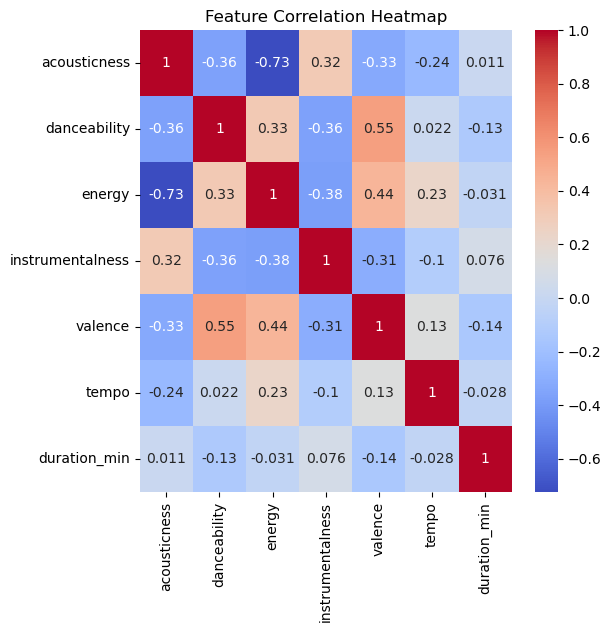

In [11]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'tempo', 'duration_min']
plt.figure(figsize=(6, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
df['mood'].value_counts(normalize=True)

mood
Neutral      0.253489
Energetic    0.235176
Happy        0.214168
Sad          0.192451
Calm         0.104716
Name: proportion, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[features]
y = df['mood']
# Encode mood labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Scale features first (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

knn = KNeighborsClassifier(
    n_neighbors=18,  # Start with 7, tune with CV
    weights='distance',  # Closer neighbors have more influence
    metric='euclidean'
)

# Train KNN model
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.3f}")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

KNN Accuracy: 0.963
              precision    recall  f1-score   support

        Calm       0.93      0.93      0.93      4874
   Energetic       0.97      0.96      0.96     10946
       Happy       0.97      0.97      0.97      9968
     Neutral       0.97      0.96      0.96     11799
         Sad       0.96      0.97      0.97      8958

    accuracy                           0.96     46545
   macro avg       0.96      0.96      0.96     46545
weighted avg       0.96      0.96      0.96     46545



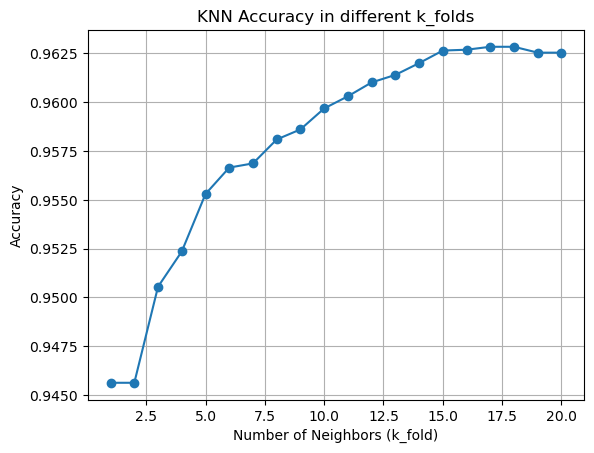

In [15]:
accuracies = []
neighbors = range(1, 21)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_test_scaled, y_test)
    accuracies.append(acc)

plt.plot(neighbors, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k_fold)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy in different k_folds")
plt.grid(True)
plt.show()


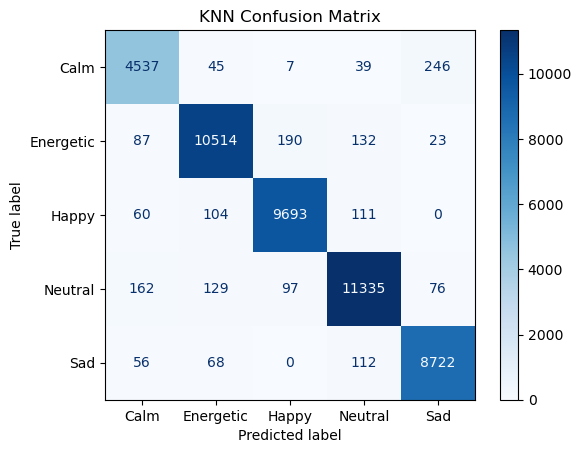

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, display_labels=le.classes_, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [17]:
# Example test input (values should match your features)
new_song = [[0.703, 0.240, 0.326, 0.000, 0.227, 171.758, 2.54]]

# Scale it using the scaler
new_song_scaled = scaler.transform(new_song)

# Predict mood
predicted_mood = le.inverse_transform(knn.predict(new_song_scaled))
print("Predicted Mood:", predicted_mood[0])

Predicted Mood: Sad


In [18]:
def recommend_songs_by_mood(mood, df, top_n=5):
    # Filter songs with given mood
    mood_songs = df[df['mood'].str.lower() == mood.lower()]
    
    if mood_songs.empty:
        print("No songs found for mood:", mood)
        return
    
    # Sort randomly or by some criteria (e.g., popularity if you have that column)
    top_songs = mood_songs.sample(n=min(top_n, len(mood_songs)), random_state=42)
    
    for index, row in top_songs.iterrows():
        print(f"Track Name: {row['track_name']}")
        print(f"Artist Name: {row['artist_name']}")
        print(f"Type: {row['genre']}")
        
        # Convert duration from minutes (or ms if needed)
        duration_min = row['duration_min']
        minutes = int(duration_min)
        seconds = int((duration_min - minutes) * 60)
        print(f"Duration: {minutes} min {seconds} sec")
        print()  # Empty line between songs

In [19]:
recommend_songs_by_mood(input("Whats your mood: "), df)

Whats your mood:  Energetic


Track Name: Cow Paint And Body Shop
Artist Name: Riders In The Sky
Type: Movie
Duration: 2 min 21 sec

Track Name: Walk This Way (feat. Aerosmith)
Artist Name: Run–D.M.C.
Type: Pop
Duration: 5 min 9 sec

Track Name: Tu Jueguito
Artist Name: Aventura
Type: Hip-Hop
Duration: 3 min 42 sec

Track Name: Candle In The Wind - Remastered 2014
Artist Name: Elton John
Type: Rock
Duration: 3 min 48 sec

Track Name: 98 Freestyle
Artist Name: Big L
Type: Hip-Hop
Duration: 2 min 9 sec



In [22]:
import joblib
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')